# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

- Base de Dados: https://drive.google.com/drive/folders/1o2lpxoi9heyQV1hIlsHXWSfDkBPtze-V?usp=sharing

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio
- TV, Jornal e Rádio estão em milhares de reais
- Vendas estão em milhões

#### Importar a Base de dados

In [2]:
import pandas as pd
historico_anuncios = pd.read_csv('advertising.csv')
historico_anuncios

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

In [3]:
!pip install seaborn
!pip install matplotlib

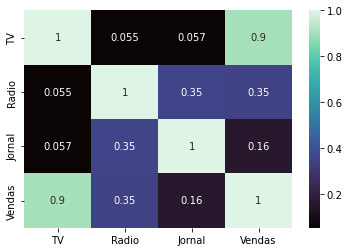

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

cmap = sns.color_palette("mako", as_cmap=True)  # criação do mapa de cores
sns.heatmap(historico_anuncios.corr(), annot=True, cmap=cmap)  # esse é um mapa que eu vi e gostei
plt.show()

#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [36]:
from sklearn.model_selection import train_test_split

x = historico_anuncios.drop('Vendas', axis=1)
y = historico_anuncios['Vendas']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, train_size=0.3)

#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

model1 = LinearRegression()
model2 = RandomForestRegressor()

model1.fit(x_treino, y_treino)  # treinamento
model2.fit(x_treino, y_treino)

RandomForestRegressor()

#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [40]:
from sklearn import metrics

print('Regressão Linear:', metrics.r2_score(y_teste, model1.predict(x_teste)))
print('Árvores de decisão:', metrics.r2_score(y_teste, model2.predict(x_teste)))

Regressão Linear: 0.8952849957734899
Árvores de decisão: 0.922550706053273


#### Visualização Gráfica das Previsões

<AxesSubplot:>

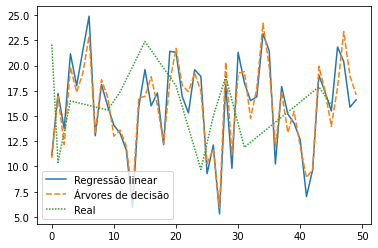

In [26]:
data_temp = pd.DataFrame()
data_temp['Regressão linear'] = model1.predict(x_teste)
data_temp['Árvores de decisão'] = model2.predict(x_teste)
data_temp['Real'] = y_teste

sns.lineplot(data=data_temp)

#### Como fazer uma nova previsão?

In [34]:
teste_futuro = pd.read_csv('novos.csv')

display(teste_futuro)
print('teste predict(linear):', model1.predict(teste_futuro))
print('teste predict(árvores):', model2.predict(teste_futuro))
# OBS: os dados também poderiam ser passados em arrays de input, nesse padrão: [[n_tv, n_radio, n_jornal]], ex:
# model1.predict([[13, 24, 62]])

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


teste predict(linear): [ 6.26701016  6.97024492 18.7272436 ]
teste predict(árvores): [ 7.577  9.244 20.23 ]


array([7.79283641])